## Exploratory Data Analysis


In [84]:
# import all the library

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [85]:
# Create a dataframe

cwd = os.getcwd()
df = pd.read_csv(cwd + "/cleaned-BA-reviews.csv", index_col=0)

In [86]:
df.head()

,reviews,star,date,country,verified,corpus
0,✅ Trip Verified | Boarding was difficult caus...,5,2024-03-14,Belgium,True,boarding difficult caused vast majority passen...
1,✅ Trip Verified | Boarding started with a del...,7,2024-03-14,Belgium,True,boarding started delay minute everybody could ...
2,✅ Trip Verified | Absolutely horrible custome...,3,2024-03-12,Canada,True,absolutely horrible customer service never fly...
3,Not Verified | BA is not what it used to be! ...,1,2024-03-11,Denmark,False,verified ba used much like onboard crew check ...
4,"✅ Trip Verified | BA First, it's not even the...",7,2024-03-10,United Kingdom,True,ba first even best business class sky cabin lo...


In [87]:
# Check the star overall rating
df.star.mean()

4.595994277539342

Text(0, 0.5, 'Total number of reviews of the rating')

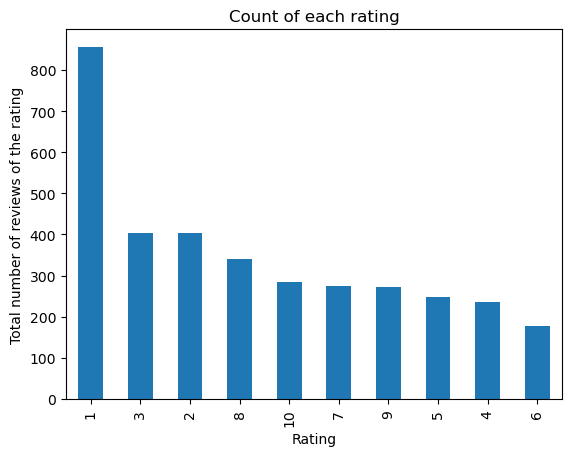

In [88]:
# By using bar plot we can see each of rating

df.star.value_counts().plot(kind="bar")

plt.title("Count of each rating")
plt.xlabel("Rating")
plt.ylabel("Total number of reviews of the rating")

In [89]:
df_rating = pd.DataFrame(df.star.value_counts())
per_value = (df_rating.star.values / df_rating.star.values.sum() * 100).tolist()
per_value = [round(x, 2) for x in per_value]
df_rating["per_value"] = per_value

In [90]:
# resetting index as we do not want to confuse between the index and the rating values
df_rating = df_rating.reset_index()

In [91]:
# Rennamig the columns

df_rating.rename(columns={"index": "Star", "star": "total_count"}, inplace=True)

In [92]:
df_rating

,Star,total_count,per_value
0,1,856,24.49
1,3,403,11.53
2,2,403,11.53
3,8,340,9.73
4,10,285,8.15
5,7,274,7.84
6,9,273,7.81
7,5,247,7.07
8,4,236,6.75
9,6,178,5.09


In [93]:
# Unique Country has recieve rating in British Airways

print(f"{len(df.country.unique())} unique country")

70 unique country


**_Which country has most reviews comes_**


In [94]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [95]:
df_country_review

,index,country
0,United Kingdom,2175
1,United States,402
2,Australia,145
3,Canada,108
4,Germany,63


In [96]:
df_country_review.rename(
    columns={"index": "country", "country": "total_reviews"}, inplace=True
)

In [97]:
df_country_review

,country,total_reviews
0,United Kingdom,2175
1,United States,402
2,Australia,145
3,Canada,108
4,Germany,63


Text(0, 0.5, 'Number of most reviews comes from each country')

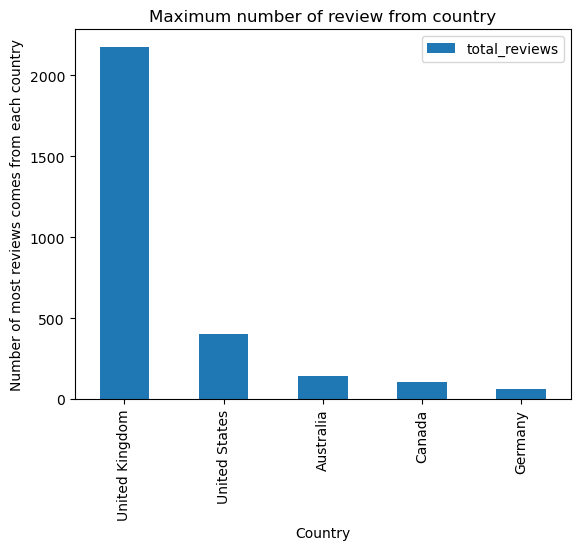

In [98]:
df_country_review.plot(kind="bar", x="country")
plt.title("Maximum number of review from country")
plt.xlabel("Country")
plt.ylabel("Number of most reviews comes from each country")

**_Which country provide average number of rating_**


In [99]:
df_country_avg_review = pd.DataFrame(
    df.groupby("country")["star"].mean().sort_values(ascending=False)
).reset_index()

In [100]:
df_country_avg_review

,country,star
0,Ecuador,10.000000
1,Indonesia,10.000000
2,Jordan,10.000000
3,Finland,8.000000
4,Philippines,7.500000
...,...,...
65,Nigeria,1.333333
66,Saint Kitts and Nevis,1.000000
67,Russian Federation,1.000000
68,Bahrain,1.000000


In [101]:
df_country_avg_review.rename(columns={"star": "avg_rating"}, inplace=True)

In this df_country_avg_review has 70 country. we will go through top 15 country


Text(0.5, 1.0, 'Top 15 Countries with avg highest rating provided to British Airways')

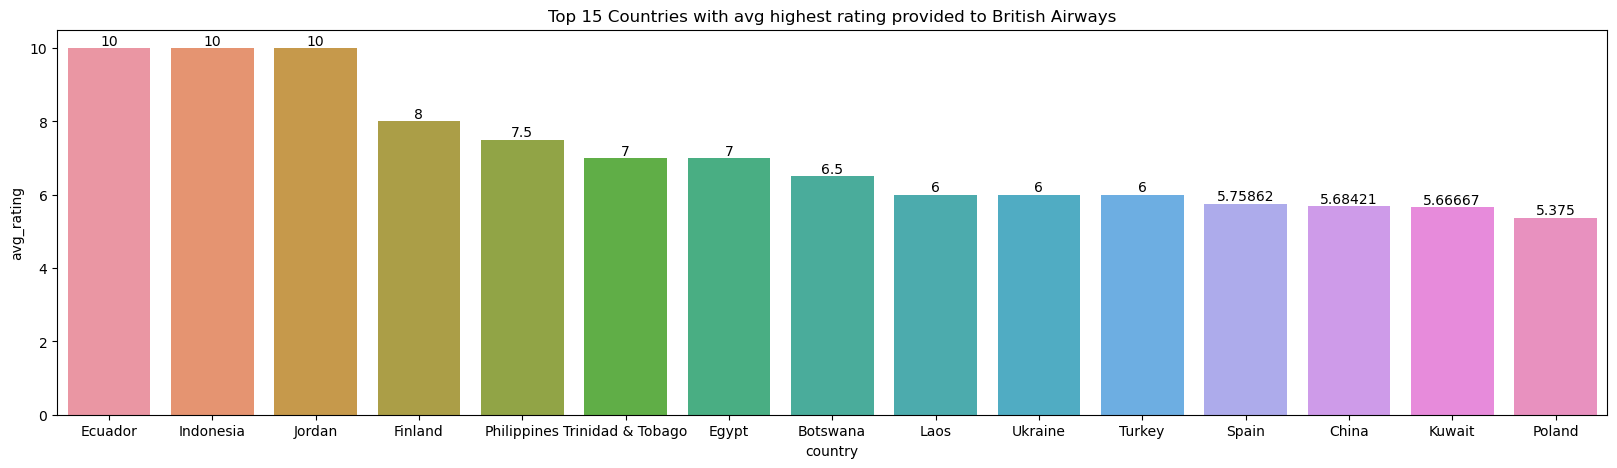

In [102]:
fig, ax = plt.subplots(figsize=(20, 5))
ax1 = sns.barplot(x="country", y="avg_rating", data=df_country_avg_review[:15])
ax.bar_label(ax.containers[0])
ax.set_title("Top 15 Countries with avg highest rating provided to British Airways")

**_Time Series Analysis_**


In [103]:
# convert the date datetype to datetime
df.date = pd.to_datetime(df.date)

In [104]:
fig = px.line(df, x="date", y="star")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

- It can seen in between April 2020 to August 2021 has decreases of the review due to the Covid Pandemic travel restrictions.
- At this point as the dates we have are from when customers posted their reviews, not taking into account the actual flight date.
- Therefore, no special meaningful trend is visible from the story.


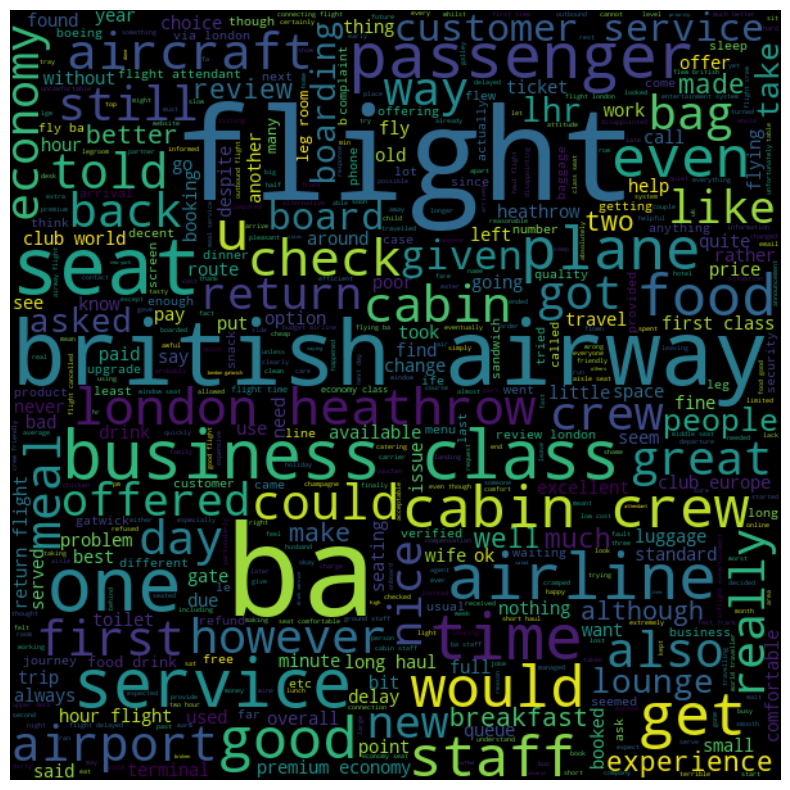

In [105]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

review = " ".join(df.corpus)
plt.figure(figsize=(20, 10))

stopwords = set(stopwords.words("english"))

# Create and generate word Cloud
wordcloud = WordCloud(
    height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords
).generate(review)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

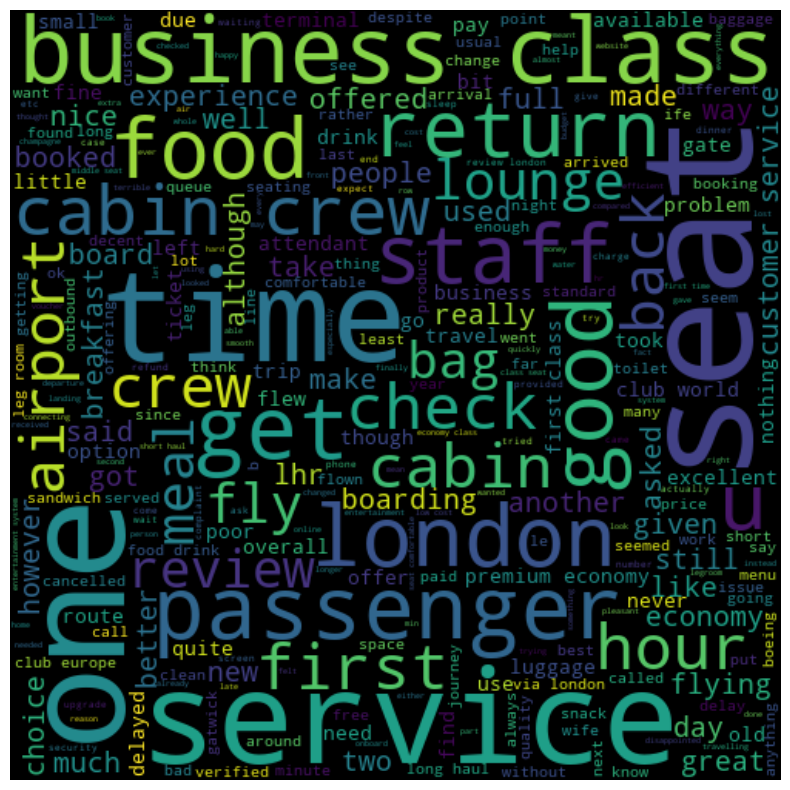

In [106]:
import nltk
from nltk.corpus import stopwords

review = " ".join(df.corpus)
plt.figure(figsize=(20, 10))
stopwords = set(stopwords.words("english"))
stopwords.update(
    [
        "ba",
        "flight",
        "british",
        "airway",
        "airline",
        "plane",
        "told",
        "also",
        "passenger" "london",
        "heathrow",
        "aircraft",
        "could",
        "even",
        "would",
    ]
)
# Create and generate a word cloud image:
wordcloud = WordCloud(
    height=500, width=500, max_font_size=100, max_words=300, stopwords=stopwords
).generate(review)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**_Word Ferquency_**


In [107]:
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Split text of all reviews into list of words

word = review.split(" ")

# remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(
    [
        "flight",
        "ba",
        "passenger",
        "u",
        "london",
        "airway",
        "british",
        "airline",
        "heathrow",
        "plane",
        "lhr",
        "review",
    ]
)


new_word = [word for word in word if word not in stopwords]

nlp_words = FreqDist(new_word).most_common(20)

# create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'customer')])

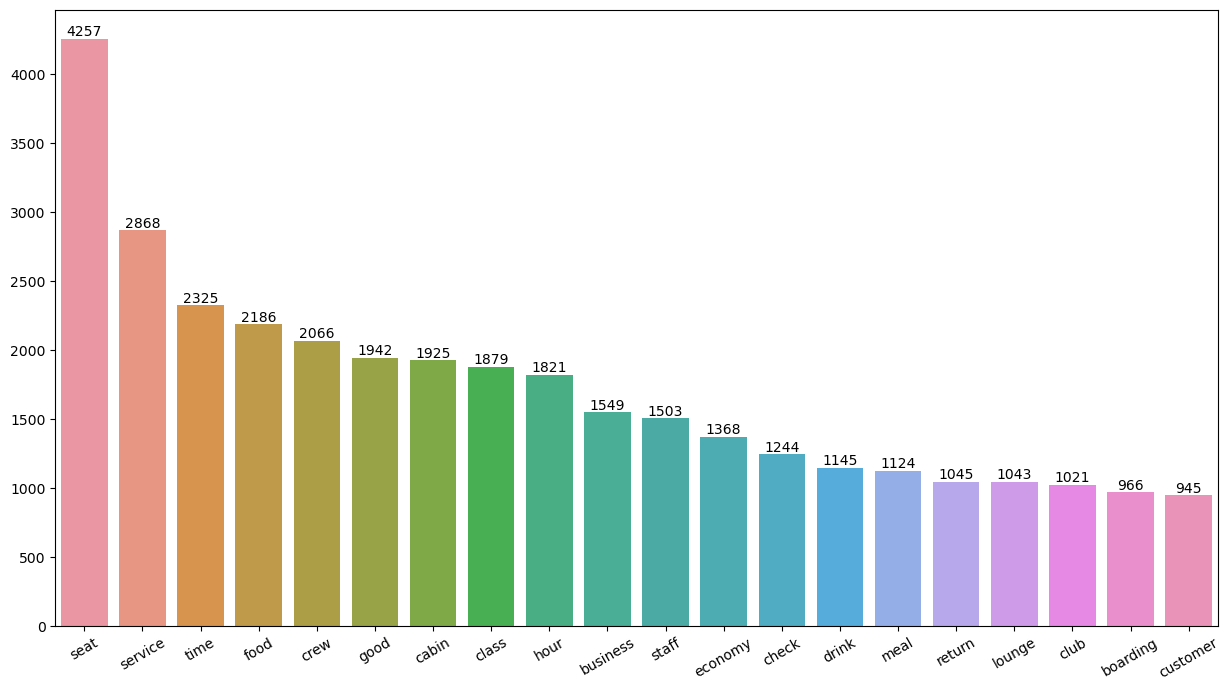

In [108]:
# Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15, 8))

# Seaborn plotting using Pandas artributes + xtrick roatation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

- This provides insight into the main topics of customer discussions. We observe that "Seat" is the most frequently mentioned aspect of the airline, followed by "Service" and "Food," all of which are crucial to customers' overall experience.

- However, we still lack information on the sentiments associated with each of these services. To add more significance to these terms, we will use n-gram plots to determine whether the experiences described are positive or negative.


**_Word Ferquency with N-gram_**


<AxesSubplot:>

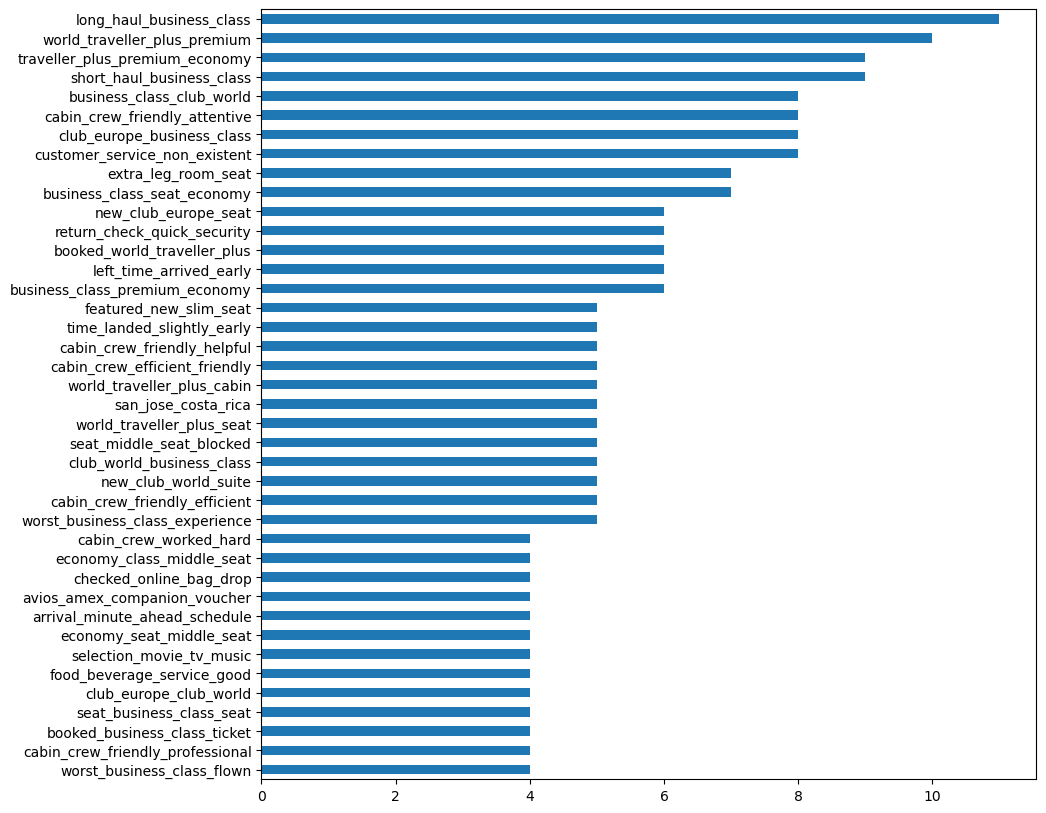

In [109]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

review = " ".join(df.corpus)

# split the text of the review into list of words
words = review.split(" ")
new_words = [word for word in words if word not in stopwords]


def get_freq_dist(new_words, number_of_ngrams):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {
        "_".join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])
    }

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words, 4)

We can see that there are many positive terms associated with the cabin crew. For example, "cabin_crew_friendly_helpful," "cabin_crew_friendly_attentive," and "cabin_crew_friendly_efficient." These terms indicate that customers are providing good reviews about the British Airways cabin crew staff.

However, another approach to gain better insights is to analyze word frequencies by grouping the reviews based on ratings. For instance, we can categorize ratings 1-3 as bad reviews, 4-8 as average/good experiences, and 9-15 as great experiences.


In [110]:
ratings_1_3 = df[df.star.isin([1, 2, 3])]
ratings_4_8 = df[df.star.isin([4, 5, 6, 7, 8])]
ratings_9_14 = df[df.star.isin([9, 10, 11, 12, 13, 14])]

<AxesSubplot:>

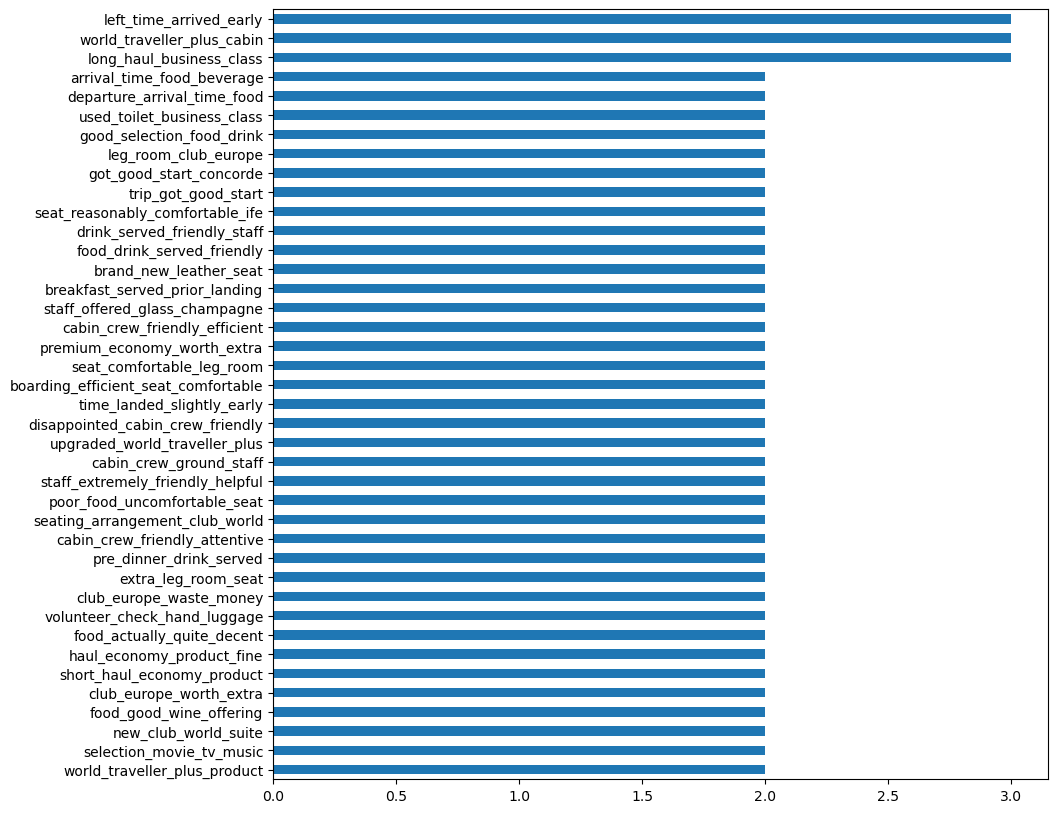

In [111]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_8 = " ".join(ratings_4_8.corpus)
reviews_9_14 = " ".join(ratings_9_14.corpus)

# split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_8 = reviews_4_8.split(" ")
words_9_14 = reviews_9_14.split(" ")


new_words_9_14 = [word for word in words_9_14 if word not in stopwords]

get_freq_dist(new_words_9_14, 4)

<AxesSubplot:>

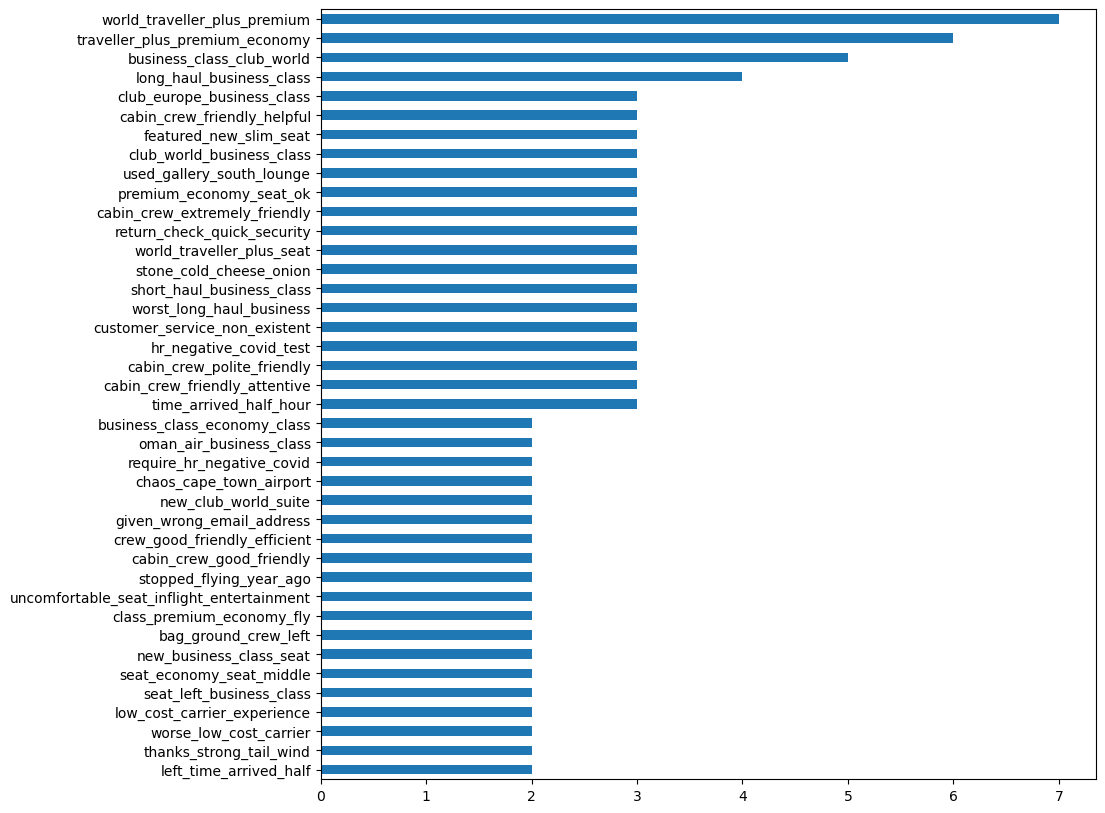

In [112]:
new_words_4_8 = [word for word in words_4_8 if word not in stopwords]

get_freq_dist(new_words_4_8, 4)

<AxesSubplot:>

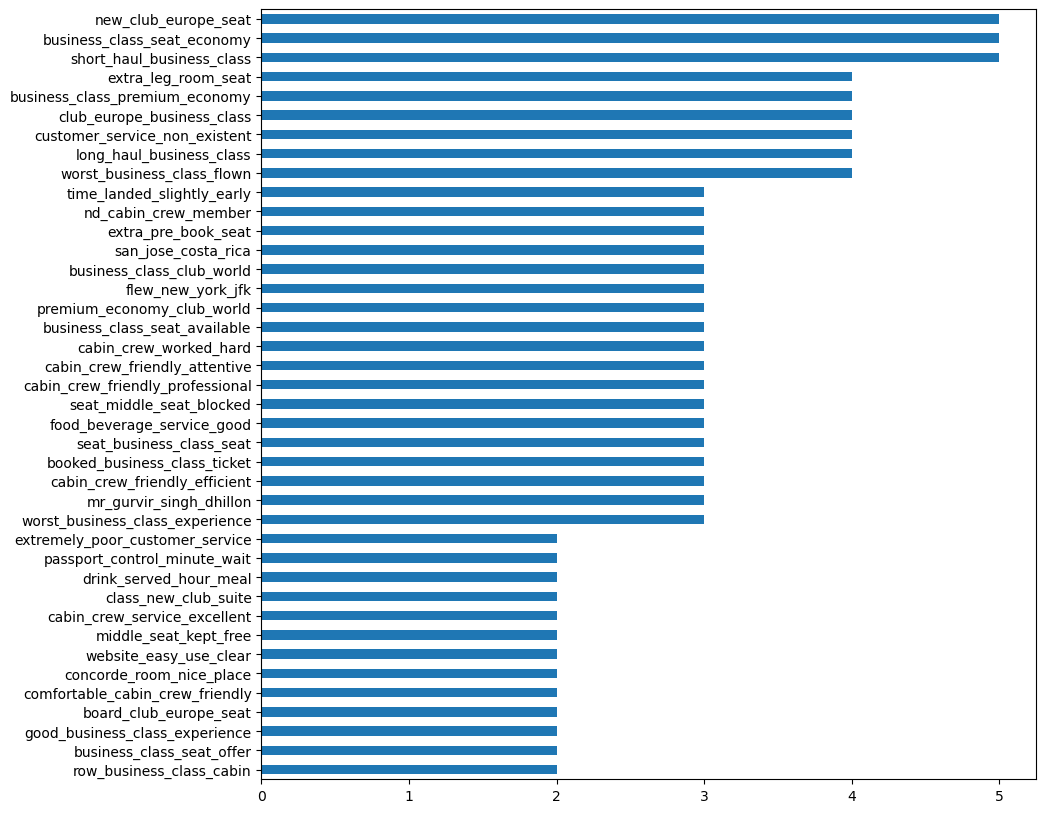

In [113]:
new_words_1_3 = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words_1_3, 4)

- Now we will use textblob library to define if the text is negative or positive and to what extent


In [114]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [115]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Set a column 'polarity' with all 0 values initially
df["polarity"] = 0

for i in range(len(df)):
    sent = TextBlob(df.iloc[i]["corpus"])
    polarity = sent.sentiment.polarity
    df.at[i, "polarity"] = polarity

In [116]:
# let's see how many texts are with positive comments

print(
    f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score"
)

print(
    f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score"
)

2389 number of reviews between -0.2 and 0.2 polarity score
1393 number of reviews between -0.1 and 0.1 polarity score


- The polarity score ranges from -1 to 1. A value closer to -1 indicates a negative review, while a value closer to 1 indicates a positive review.

- If we set a threshold where any review with a polarity greater than 0.2 is considered positive and less than -0.2 is considered negative, we are left with 2286 reviews in the neutral zone. To further reduce the number of neutral reviews, we can adjust the threshold to 0.1.

We will also try another method of labeling the reviews as positive or negative by using the VADER algorithm from the NLTK library.


In [117]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download("vader_lexicon")

vds = SentimentIntensityAnalyzer()

# Ensure 'corpus' column is all strings
df["corpus"] = df["corpus"].astype(str)

# Set a column 'label' with all 0 values initially
df["label"] = 0

for i in range(len(df)):
    score = vds.polarity_scores(df.iloc[i]["corpus"])["compound"]
    if score > 0.2:
        df.at[i, "label"] = 1
    elif score < 0:
        df.at[i, "label"] = -1
    else:
        df.at[i, "label"] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sushant/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [118]:
df.label.value_counts()

 1    2205
-1    1170
 0     125
Name: label, dtype: int64

**_Topic Modeling with LDA_**


We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.


In [119]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names()

In [120]:
from sklearn.decomposition import LatentDirichletAllocation

# declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

# fit the term frequency data to the model
model.fit(tf)

# create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

# loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)] = [
        "{}".format(tf_feature_names[i]) for i in topic.argsort()[: -10 - 1 : -1]
    ]
    topic_dict["Topic %d weights" % (topic_idx)] = [
        "{:.1f}".format(topic[i]) for i in topic.argsort()[: -10 - 1 : -1]
    ]

df_topic = pd.DataFrame(topic_dict)

In [121]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,seat,906.6,seat,61.1,seat,1848.2,flight,1991.1,flight,1981.0,flight,697.9,flight,392.4,flight,442.2
1,class,906.0,singapore,48.7,flight,1382.9,time,668.6,ba,1136.2,seat,608.9,meal,386.7,ba,438.6
2,ba,898.3,flight,41.2,ba,1307.8,crew,648.1,hour,660.0,service,466.3,ba,306.7,check,404.0
3,lounge,792.3,screen,28.4,airline,930.7,good,594.4,customer,644.1,british,421.7,seat,289.1,bag,331.9
4,club,701.1,sydney,27.1,economy,885.6,cabin,440.2,british,607.6,crew,418.9,crew,281.0,staff,303.8
5,good,695.4,cabin,25.9,british,791.0,service,384.2,airway,606.9,airway,416.1,cabin,242.2,seat,229.5
6,business,646.5,attendant,24.1,airway,782.8,heathrow,377.7,london,560.8,ba,381.7,good,189.2,hour,224.5
7,first,629.8,one,21.4,food,690.2,london,370.4,service,520.6,cabin,378.8,lhr,188.6,boarding,223.1
8,flight,617.4,crew,19.4,service,674.4,ba,320.8,day,474.3,food,338.1,food,188.0,time,217.1
9,food,596.5,bit,14.6,class,617.2,boarding,313.1,told,471.5,staff,254.4,service,183.2,gate,204.1


There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.


**_Topic Modeling with NMF_**


In [122]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, init="random", random_state=0)
nmf.fit_transform(tf)

array([[0.07642504, 0.03901989],
       [0.0746171 , 0.05525675],
       [0.0842188 , 0.        ],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [123]:
topic_dict = {}

# loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)] = [
        "{}".format(tf_feature_names[i]) for i in topic.argsort()[: -10 - 1 : -1]
    ]
    topic_dict["Topic %d weights" % (topic_idx)] = [
        "{:.1f}".format(topic[i]) for i in topic.argsort()[: -10 - 1 : -1]
    ]

df_topic = pd.DataFrame(topic_dict)

In [124]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,33.2,seat,16.7
1,ba,11.2,ba,9.5
2,hour,7.8,class,7.5
3,time,6.1,business,6.0
4,london,5.9,service,6.0
5,airway,5.8,food,5.9
6,british,5.8,cabin,5.6
7,service,5.3,good,5.4
8,would,4.8,crew,5.3
9,airline,4.2,economy,4.6


With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.
